In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('data/ACME-HappinessSurvey2020.csv')

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers \
X1 = my order was delivered on time \
X2 = contents of my order was as I expected \
X3 = I ordered everything I wanted to order \
X4 = I paid a good price for my order \
X5 = I am satisfied with my courier \
X6 = the app makes ordering easy for me 

# Explore the data
1. make sure data is balanced
2. inspect correlations among features

In [3]:
df.dtypes

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

In [4]:
df.mean()

Y     0.547619
X1    4.333333
X2    2.531746
X3    3.309524
X4    3.746032
X5    3.650794
X6    4.253968
dtype: float64

In [5]:
df.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


/var/folders/nd/hzd0zcf9363clrvwfc13r9940000gn/T/ipykernel_5403/4269691155.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  a = df.hist(ax = ax);


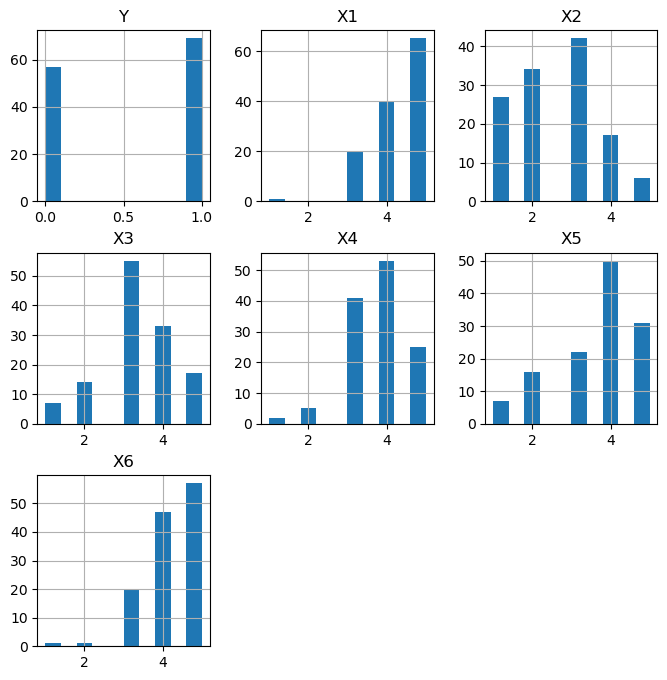

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
a = df.hist(ax = ax);

In [40]:
def print_metric(clf,X_train, X_test, y_train, y_test):
    from sklearn.metrics import accuracy_score,precision_score,recall_score
    print('Training accuracy score',accuracy_score(clf.predict(X_train),y_train))
    print('Testing accuracy score',accuracy_score(clf.predict(X_test),y_test))
    print('precision score',precision_score(clf.predict(X_test),y_test))
    print('recall score',recall_score(clf.predict(X_test),y_test))

X1 and X6 are best performing. X2 is the least satisfying.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
encoded_data = OneHotEncoder(drop='first',sparse=False).fit_transform(df)
X_train, X_test, y_train, y_test  = train_test_split(encoded_data[:,1:],encoded_data[:,0], test_size=0.3, random_state=0)
print('Training data shape: ', X_train.shape)

Training data shape:  (88, 23)


In [24]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print_metric(clf,X_train, X_test, y_train, y_test)

Training accuracy score 0.7386363636363636
Testing accuracy score 0.5526315789473685
precision score 0.7647058823529411
recall score 0.5


In [32]:
from sklearn.tree import DecisionTreeClassifier
tree =  DecisionTreeClassifier(random_state=0,ccp_alpha=.1).fit(X_train, y_train)
print_metric(tree,X_train, X_test, y_train, y_test)

Training accuracy score 0.5909090909090909
Testing accuracy score 0.4473684210526316
precision score 1.0
recall score 0.4473684210526316


In [33]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( random_state=0).fit(X_train, y_train)
print_metric(forest,X_train, X_test, y_train, y_test)


Training accuracy score 0.9545454545454546
Testing accuracy score 0.5
precision score 0.5294117647058824
recall score 0.45


### Testing accuracy substantially lower than training accuracy, indicating overfitting.

# Feture selection
Use Decision tree as a base estimator to perform feature selection

## Drop one column

In [58]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
testing_accuracy = []
for feature in df.drop(columns='Y').columns:
    encoded_data = OneHotEncoder(drop='first',sparse=False).fit_transform(df.drop(columns=feature))
    X_train, X_test, y_train, y_test  = train_test_split(encoded_data[:,1:],encoded_data[:,0], test_size=0.3, random_state=0)
    tree =  DecisionTreeClassifier(random_state=0,ccp_alpha=.1).fit(X_train, y_train)
    accuracy = accuracy_score(tree.predict(X_test),y_test)
    testing_accuracy.append((feature,accuracy))
    print(feature,accuracy)
max_feature = max(testing_accuracy, key=lambda x: x[1])
print("Feature to drop:", max_feature[0])
print("accracy after drop:", max_feature[1])


X1 0.4473684210526316
X2 0.4473684210526316
X3 0.4473684210526316
X4 0.4473684210526316
X5 0.4473684210526316
X6 0.4473684210526316
Feature to drop: X1
accracy after drop: 0.4473684210526316


## Drop two columns

In [59]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from itertools import combinations
testing_accuracy = []
for combination in combinations(df.drop(columns='Y').columns, 2):
    encoded_data = OneHotEncoder(drop='first',sparse=False).fit_transform(df.drop(columns='Y').drop(columns=[*combination]))
    X_train, X_test, y_train, y_test  = train_test_split(encoded_data[:,1:],encoded_data[:,0], test_size=0.3, random_state=0)
    tree =  DecisionTreeClassifier(random_state=0,ccp_alpha=.1).fit(X_train, y_train)
    accuracy = accuracy_score(tree.predict(X_test),y_test)
    testing_accuracy.append((combination,accuracy))
    print(combination,accuracy)
max_feature = max(testing_accuracy, key=lambda x: x[1])
print("Feature to drop:", max_feature[0])
print("accracy after drop:", max_feature[1])

('X1', 'X2') 0.8947368421052632
('X1', 'X3') 0.7631578947368421
('X1', 'X4') 0.7631578947368421
('X1', 'X5') 0.7631578947368421
('X1', 'X6') 0.7631578947368421
('X2', 'X3') 1.0
('X2', 'X4') 1.0
('X2', 'X5') 1.0
('X2', 'X6') 1.0
('X3', 'X4') 1.0
('X3', 'X5') 1.0
('X3', 'X6') 1.0
('X4', 'X5') 1.0
('X4', 'X6') 1.0
('X5', 'X6') 1.0
Feature to drop: ('X2', 'X3')
accracy after drop: 1.0


There are multiple ways to drop the columns to get optimal testing acuuracy.

# Final model
## drop X2 and X3

In [62]:
encoded_data = OneHotEncoder(drop='first',sparse=False).fit_transform(df.drop(columns='Y').drop(columns=['X2','X3']))
X_train, X_test, y_train, y_test  = train_test_split(encoded_data[:,1:],encoded_data[:,0], test_size=0.3, random_state=0)
tree =  DecisionTreeClassifier(random_state=0,ccp_alpha=.1).fit(X_train, y_train)
print_metric(tree,X_train, X_test, y_train, y_test)

Training accuracy score 0.9886363636363636
Testing accuracy score 1.0
precision score 1.0
recall score 1.0
